In [1]:
import pickle
from glob import glob
from tqdm.notebook import tqdm_notebook
import tensorflow as tf
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# !pip install gdown
# from google.colab import drive
# drive.mount('/content/drive')

# https://drive.google.com/drive/folders/1onfxMdwnnx1hRetAi3fHDg4QlaPhtYaP?usp=sharing
# https://drive.google.com/file/d/1_KLtFFspxfOqUWr2-jHaPYf5tXZM8p61/view?usp=drive_link

links = [
    # 'https://drive.google.com/file/d/1AoPgbUgiO05eGc5tVoBTulXHR5eVDBso/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1y0bhkY4mTGFYt_n1M0NYNTiLniYqjhvp/view?usp=drive_link',
    # 'https://drive.google.com/file/d/19bQDgTjh98K-koq2pwbUO5dR7lk1D_N5/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1UyVWLP_j8HqJCo-Lr3R1HGz0NAX-Nrw0/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1r4iIruijLokGfpG2BDbc4un6g7P3_TO8/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1Ff94H-YEk_UNENoT7OrEPjjTWSz4w_rl/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1JK6JNkQSCD0MrrLTgxmflQQgeLBU_lT6/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1MV55utsG7sEOuibaVS3FZQMF4fi7Gv22/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1l4HPc8t8VOGXjDlWJS0VKnG7Q-bQxnyW/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1NwLCYQ4ua4upax8s0d_EoHPb0rGShvuB/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1OkKOd727cKVNJ-LPBikWbvBxd7TjybvD/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1WTSRPF9kWScT7jMdFIXDCZ6UarFvCQRi/view?usp=drive_link',
    'https://drive.google.com/file/d/1unNiOUlm5JcZ4fOFhKE44UxBxwQkLqV1/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1jsxJOA2JvNquqdD8eS3ZlLRbtnzfgeRM/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1sUO4gBEkGdTLoLYPnt8Wy0SkBNHuGEMR/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1IR6LmlQ85OglWWfNqxnnu_tPLixzNWJO/view?usp=drive_link',
    # 'https://drive.google.com/file/d/14DFcn7LcpOKEL69yyQy9tWr2e6D9Ob8e/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1tWPDhlvwDIaR74QCRAzH3pOg4138LsiF/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1wfuQ4ez29lbiCgCRGoxeScz0m6X2pQLK/view?usp=drive_link',
    # 'https://drive.google.com/file/d/17PBS-JHUqpD7YKbrUP93LujwtmgUUmI2/view?usp=drive_link',
    # 'https://drive.google.com/file/d/16LvLmYKu2VZmFq3TQxIT8t9lFRGnWbEg/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1yeZ74E_VdZWLTlDftXwnSNhstYv_dPFw/view?usp=drive_link',
    # 'https://drive.google.com/file/d/13NK4WzndT53SRdrQ9g6jkScLyJ1pt3vX/view?usp=drive_link',
    # 'https://drive.google.com/file/d/1zgE5_NSkLF8kiynJ7nKEDru_ZKBlq7Wm/view?usp=drive_link'
]

import gdown 

for i, link in enumerate(links):
    id_ = link.split('/')[-2]
    gdown.download(url = f"https://drive.google.com/uc?id={id_}", output = f'RAVDESS13.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1unNiOUlm5JcZ4fOFhKE44UxBxwQkLqV1
From (redirected): https://drive.google.com/uc?id=1unNiOUlm5JcZ4fOFhKE44UxBxwQkLqV1&confirm=t&uuid=2d06b436-2c65-4082-bd0f-fd0dbed53ed5
To: /Users/abhishekgupta/Documents/Major Project/RAVDESS13.zip

  0%|                                                | 0.00/502M [00:00<?, ?B/s]
  0%|                                        | 524k/502M [00:00<03:51, 2.17MB/s]
  0%|                                       | 1.57M/502M [00:00<02:13, 3.76MB/s]
  1%|▏                                      | 3.15M/502M [00:00<01:13, 6.81MB/s]
  1%|▎                                      | 4.19M/502M [00:00<01:22, 6.00MB/s]
  1%|▍                                      | 5.24M/502M [00:01<01:31, 5.44MB/s]
  1%|▌                                      | 6.82M/502M [00:01<01:21, 6.06MB/s]
  2%|▌                                      | 7.86M/502M [00:01<01:25, 5.80MB/s]
  2%|▋                                      | 8.91M/502

In [ ]:
!unzip /content/drive/MyDrive/FERV39K/2_ClipsforFaceCrop.zip

In [ ]:
!unzip /content/drive/MyDrive/FERV39K/4_setups.zip

In [ ]:
import numpy as np
a = np.array([[2, 3]])
b = np.array([1, 2])
print(np.vstack([a,b]))

In [2]:
!unzip Audio_Speech_Actors_01-24.zip

Archive:  Audio_Speech_Actors_01-24.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  inflating: Actor_01/03-01-0

In [11]:
xyz = glob('Video_Speech_Actor_*.zip')
for name in xyz:
    !unzip '{name}'

Archive:  Video_Speech_Actor_19.zip
  inflating: Actor_19/01-01-01-01-01-01-19.mp4  
  inflating: Actor_19/01-01-01-01-01-02-19.mp4  
  inflating: Actor_19/01-01-01-01-02-01-19.mp4  
  inflating: Actor_19/01-01-01-01-02-02-19.mp4  
  inflating: Actor_19/01-01-02-01-01-01-19.mp4  
  inflating: Actor_19/01-01-02-01-01-02-19.mp4  
  inflating: Actor_19/01-01-02-01-02-01-19.mp4  
  inflating: Actor_19/01-01-02-01-02-02-19.mp4  
  inflating: Actor_19/01-01-02-02-01-01-19.mp4  
  inflating: Actor_19/01-01-02-02-01-02-19.mp4  
  inflating: Actor_19/01-01-02-02-02-01-19.mp4  
  inflating: Actor_19/01-01-02-02-02-02-19.mp4  
  inflating: Actor_19/01-01-03-01-01-01-19.mp4  
  inflating: Actor_19/01-01-03-01-01-02-19.mp4  
  inflating: Actor_19/01-01-03-01-02-01-19.mp4  
  inflating: Actor_19/01-01-03-01-02-02-19.mp4  
  inflating: Actor_19/01-01-03-02-01-01-19.mp4  
  inflating: Actor_19/01-01-03-02-01-02-19.mp4  
  inflating: Actor_19/01-01-03-02-02-01-19.mp4  
  inflating: Actor_19/01-01-03-02

In [19]:
def noise(data, noise_factor):
    
    """
    add random white noises to the audio

    Parameters
    ----------
    data : np.ndarray, audio time series
    noise_factor : float, the measure of noise to be added 

    """
    noise = np.random.randn(len(data)) 
    augmented_data = data + noise_factor * noise
    
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data
def shift(data, sampling_rate, shift_max, shift_direction):
    
    """
    shift the spectogram in a direction
    
    Parameters
    ----------
    data : np.ndarray, audio time series
    sampling_rate : number > 0, sampling rate
    shift_max : float, maximum shift rate
    shift_direction : string, right/both
    
    """
    shift = np.random.randint(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    elif shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_data = np.roll(data, shift)
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
        
    return augmented_data

In [20]:
def get_frames(file_name, req_frames = 30):
    
    cap = cv2.VideoCapture(file_name)
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    step = num_frames // req_frames

    # while(True):
    #     cnt = cnt + 1
    #     _, frame = cap.read()
    #     if frame is None: 
    #         break
    #     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #     # print(frame.shape)
    #     res = cv2.resize(frame, dsize = (400, 224))
    #     plt.imshow(res)

        # cv2.waitkey(0)
    
    def frame(i):
        cap.set(1, i * step)
        _, frame = cap.read()

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        res = cv2.resize(frame, dsize = (400, 224))
        
        # f * w * h * c
        
        # cnt = cnt + 1
        return res
        
    frames = [frame(i) for i in range(req_frames)]
    
    frames = np.array(frames)
    
    return frames

In [21]:
file_name = 'Actor_01/01-01-01-01-01-01-01.mp4'
actor_name = file_name.split('/')[0]
vid_name = file_name.split('/')[1].split('-')

vid_name[0] = '03'

vid_name = '-'.join(vid_name).replace('.mp4','.wav')

file_name_ = actor_name + '/' + vid_name

file_name_

'Actor_01/03-01-01-01-01-01-01.wav'

In [17]:
import numpy as np

np.random.randint(0, 3)

0

In [22]:
def get_audio(file_name, req_wind = 100):
  # file_name = file_name + '.wav'
    actor_name = file_name.split('/')[0]
    vid_name = file_name.split('/')[1].split('-')
    
    vid_name[0] = '03'
    
    vid_name = '-'.join(vid_name).replace('.mp4','.wav')
    
    file_name_ = actor_name + '/' + vid_name
    y, sr = librosa.load(file_name_, sr = None)
    num_samples = len(y)
    
    window_size = int(0.2 * sr)  # 0.2 seconds window size
    hop_size = int(0.1 * sr)     # 0.1 seconds hop size

    aug = np.random.randint(0,2)

    if aug == 1:
        y = noise(data = y, noise_factor = 0.001)
        y = shift(data = y, sampling_rate = sr, shift_max = 0.15, shift_direction = 'both')

    feat = librosa.feature.mfcc(y=y, sr=sr, n_fft=window_size, hop_length=hop_size, n_mfcc=25).T
    feat1 = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=window_size, hop_length=hop_size).T
    
    num = feat.shape[0]
    num_feature = feat.shape[1]
    num_feature1 = feat1.shape[1]

    if(num > req_wind):
        step = num // req_wind

        feat_ = [feat[i * step, :] for i in range(req_wind)]
        feat_ = np.array(feat_)
        feat_1 = [feat1[i * step, :] for i in range(req_wind)]
        feat_1= np.array(feat_1)

        return np.concatenate((feat_, feat_1), axis = 1) 
    else: 
        feat__ = np.concatenate((feat, feat1), axis = 1)

        padding = np.zeros((req_wind - num, num_feature + num_feature1))

        return np.concatenate((feat__, padding), axis = 0) 
    # return np.hstack((mfccs, mel))

In [62]:
frames = get_frames('Actor_01/01-01-01-01-01-01-01.mp4', req_frames= )
# plt.imshow(img[0])
# img.shape
print(frames.shape)

(30, 224, 400)


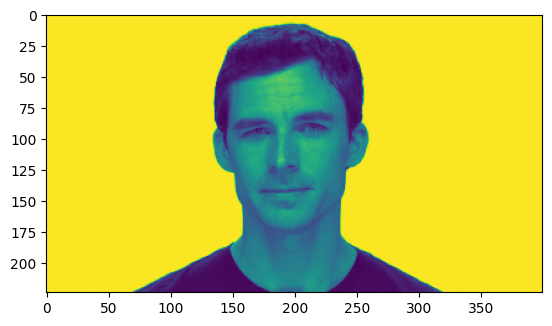

In [63]:
plt.imshow(frames[29])

In [60]:
len(get_audio('/content/Actor_01/03-01-01-01-01-01-01'))

168

In [9]:
get_audio('Actor_01/03-01-01-01-01-01-01.wav').shape

(100, 153)

In [28]:
video_files = glob('/content/Actor_01/*.wav')
len(video_files)

60

In [23]:
from tqdm import tqdm

In [24]:
video_files = glob('Actor_*/01-*.mp4')
len(video_files)

1440

In [25]:
audio_files = glob('Actor_*/03-*.wav')
audio_files

['Actor_16/03-01-05-01-02-01-16.wav',
 'Actor_16/03-01-06-01-02-02-16.wav',
 'Actor_16/03-01-06-02-01-02-16.wav',
 'Actor_16/03-01-05-02-01-01-16.wav',
 'Actor_16/03-01-07-01-01-01-16.wav',
 'Actor_16/03-01-04-01-01-02-16.wav',
 'Actor_16/03-01-04-02-02-02-16.wav',
 'Actor_16/03-01-07-02-02-01-16.wav',
 'Actor_16/03-01-08-02-02-01-16.wav',
 'Actor_16/03-01-08-01-01-01-16.wav',
 'Actor_16/03-01-03-02-02-02-16.wav',
 'Actor_16/03-01-03-01-01-02-16.wav',
 'Actor_16/03-01-02-02-01-01-16.wav',
 'Actor_16/03-01-01-01-02-02-16.wav',
 'Actor_16/03-01-02-01-02-01-16.wav',
 'Actor_16/03-01-03-02-01-01-16.wav',
 'Actor_16/03-01-03-01-02-01-16.wav',
 'Actor_16/03-01-02-02-02-02-16.wav',
 'Actor_16/03-01-02-01-01-02-16.wav',
 'Actor_16/03-01-01-01-01-01-16.wav',
 'Actor_16/03-01-06-01-01-01-16.wav',
 'Actor_16/03-01-05-01-01-02-16.wav',
 'Actor_16/03-01-05-02-02-02-16.wav',
 'Actor_16/03-01-06-02-02-01-16.wav',
 'Actor_16/03-01-04-01-02-01-16.wav',
 'Actor_16/03-01-07-01-02-02-16.wav',
 'Actor_16/0

In [28]:
video_files = glob('Actor_*/01-*.mp4')
# audio_files = glob('Actor_*/03-*.wav')

# print('Extracting Frame Data!')
# frame_data = np.array([get_frames(name) for name in tqdm(video_files)])
# print('Extracting Audio Data!')
# audio_data = np.array([get_audio(name) for name in tqdm(audio_files)])
print('Extracting Output Data!')
output_data = np.array([int(name.split('/')[-1][6:8]) for name in tqdm(video_files)])

Extracting Output Data!


100%|██████████████████████████████████| 1440/1440 [00:00<00:00, 2852998.47it/s]


In [27]:
# audio_files = glob('Actor_*/03-*.wav')
video_files = glob('Actor_*/01-*.mp4')

print('Extracting Audio Data!')
audio_data = np.array([get_audio(name, req_wind= 180) for name in tqdm(video_files)])
audio_data.shape

Extracting Audio Data!


100%|███████████████████████████████████████| 1440/1440 [00:26<00:00, 54.12it/s]


(1440, 180, 153)

In [39]:
output_data

array([6, 5, 5, ..., 2, 1, 2])

In [29]:
from sklearn.model_selection import train_test_split

video_train, video_test, output_train, output_test = train_test_split(video_files, output_data, test_size = 0.3, stratify = output_data)
len(video_train), len(video_test)

(1008, 432)

In [30]:
print("Training Data\n")
print('Extracting Frame Data!')
frame_data_train = np.array([get_frames(name, req_frames = 10) for name in tqdm(video_train)])
print('Extracting Audio Data!')
audio_data_train = np.array([get_audio(name, req_wind= 180) for name in tqdm(video_train)])

print("\nTesting Data\n")
print('Extracting Frame Data!')
frame_data_test = np.array([get_frames(name, req_frames= 10) for name in tqdm(video_test)])
print('Extracting Audio Data!')
audio_data_test = np.array([get_audio(name, req_wind= 180) for name in tqdm(video_test)])

Training Data

Extracting Frame Data!


100%|███████████████████████████████████████| 1008/1008 [03:23<00:00,  4.95it/s]


Extracting Audio Data!


100%|███████████████████████████████████████| 1008/1008 [00:20<00:00, 48.23it/s]



Testing Data

Extracting Frame Data!


100%|█████████████████████████████████████████| 432/432 [01:42<00:00,  4.20it/s]


Extracting Audio Data!


100%|█████████████████████████████████████████| 432/432 [00:11<00:00, 38.90it/s]


In [31]:
frame_data_test.shape

(432, 10, 224, 400)

In [14]:
video_files = glob('Actor_*/01-*.mp4')

print('Extracting Frame Data!')
frame_data = np.array([get_frames(name, req_frames = 10) for name in tqdm(video_files)])

Extracting Frame Data!


100%|███████████████████████████████████████| 1440/1440 [04:44<00:00,  5.07it/s]


In [32]:
frame_data_test_ = np.expand_dims(frame_data_test, axis = 4)
frame_data_train_ = np.expand_dims(frame_data_train, axis = 4)
frame_data_train_.shape

(1008, 10, 224, 400, 1)

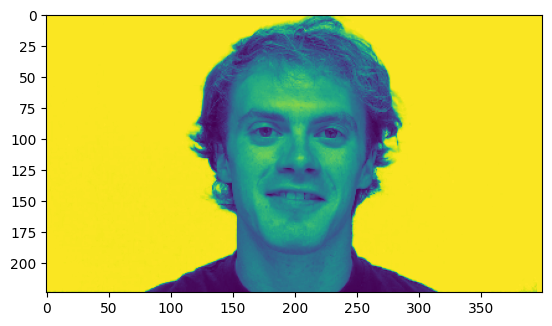

In [85]:
plt.imshow(frame_data_[100][0])

In [15]:
frame_data.shape

(1440, 10, 224, 400)

In [33]:
np.savez_compressed('Video_data_train_10-Aug.npz', frame_data_train_)
np.savez_compressed('Video_data_test_10-Aug.npz', frame_data_test_)

In [4]:
frame_data.shape, audio_data.shape, output_data.shape

((1440, 30, 224, 400), (1440, 168), (1440,))

In [34]:
# with open('Video_data10.pickle', 'wb') as f:
#     pickle.dump(frame_data_, f)
with open('Audio_data_train-Aug.pickle', 'wb') as f:
    pickle.dump(audio_data_train, f)
with open('Audio_data_test-Aug.pickle', 'wb') as f:
    pickle.dump(audio_data_test, f)
with open('Output_data_train-Aug.pickle', 'wb') as f:
    pickle.dump(output_train, f)
with open('Output_data_test-Aug.pickle', 'wb') as f:
    pickle.dump(output_test, f)

In [15]:
audio_data_train

array([[[-6.50834106e+02,  0.00000000e+00,  0.00000000e+00, ...,
          5.38529799e-09,  1.04833777e-08,  1.70848349e-08],
        [-6.50834106e+02,  0.00000000e+00,  0.00000000e+00, ...,
          9.24308630e-09,  1.03696731e-08,  1.21759101e-08],
        [-6.50524048e+02,  4.38275069e-01,  4.37636614e-01, ...,
          3.20345421e-08,  3.80946830e-08,  3.74180438e-08],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-7.97265808e+02,  4.69383955e+00,  4.68087482e+00, ...,
          3.52725884e-08,  1.93601952e-08,  1.68521428e-08],
        [-7.77289246e+02,  1.21309090e+01,  8.47784138e+00, ...,
          1.05152630e-07,  1.00662689e

In [3]:
with open('Video_data.pickle', 'rb') as f:
    frame_data = pickle.load(f)
with open('Audio_data.pickle', 'rb') as f:
    audio_data = pickle.load(f)
with open('Output_data.pickle', 'rb') as f:
    output_data = pickle.load(f)

In [3]:
frame_data_ = np.load('Video_data_.npz')['arr_0']
frame_data_.shape

(1440, 30, 224, 400, 1)

In [4]:
X_list = [[frame_data_[i, j, :, :, :] for j in range(30)] for i in range(1440)]
len(X_list)

1440

In [9]:
with open('x_list.pickle', 'wb') as f:
    pickle.dump(X_list, f)

In [7]:
X_list[0][29].shape

(224, 400, 1)

In [ ]:
frame_data_ = frame_data_.astype('float64')

In [15]:
frame_data_[1000][0][112][200][0].dtype

dtype('uint8')

In [4]:
for i in range(1440):
    for j in range(30):
        frame_data__[i, j, :, :, :] = frame_data__[i, j, :, :, :] / 255

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [3]:
frame_data__ = tf.convert_to_tensor(frame_data_, dtype = tf.float64)
# audio_data_ = tf.convert_to_tensor(audio_data, dtype = tf.float64)
# output_data_ = tf.convert_to_tensor(output_data, dtype = tf.int32)

In [6]:
frame_data__.shape
01928374

TensorShape([1440, 30, 224, 400, 1])

In [12]:
frame_data__[1000][0][112][200][0]

<tf.Tensor: shape=(), dtype=float64, numpy=0.0>

In [7]:
np.savez_compressed('Video_data_tensor.npz', frame_data__)

In [ ]:
frame_data__ = frame_data__ / 255

In [ ]:
np.savez_compressed('Video_data_.npz', frame_data_)

In [ ]:
with open('Video_data_64.pickle', 'wb') as f:
    pickle.dump(frame_data_, f)
with open('Audio_data_64.pickle', 'wb') as f:
    pickle.dump(audio_data_, f)
with open('Output_data_32.pickle', 'wb') as f:
    pickle.dump(output_data_, f)

In [11]:
video_data = np.load('Video_data_train_10.npz', mmap_mode='r+')['arr_0']
with open('Audio_data_train.pickle', 'rb') as f:
    audio_data = pickle.load(f)
with open('Output_data_train.pickle', 'rb') as f:
    output_data = pickle.load(f)
video_data.shape, audio_data.shape, output_data.shape

((1008, 10, 224, 400, 1), (1008, 100, 153), (1008,))

In [15]:
video_data_ = video_data[:435, :, :, :, :]
audio_data_ = audio_data[:435, :, :]
output_data_ = output_data[:435]

video_data_.shape, audio_data_.shape, output_data_.shape

((435, 10, 224, 400, 1), (435, 100, 153), (435,))